# supervised learning:


categorical outcome:
K-nearest neighbours,
Decisions Trees,
Logiestic regressions,
Forest 

numerical: 
linear regression,
K-nearest neighbours,
Neural Networks


## objective:
What types of machine learning models perform best on this dataset?

Which features are most indicative of a poisonous mushroom?



In [248]:
## import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [249]:
## load the data
df = pd.read_csv(r"mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [251]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [252]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [253]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column, df[column].unique())


class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


no missing data 

but categorical data so encoding is needed to turn into numerical data (for machine learning) as ML prefers numerical data 



In [254]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

(-1.0999992858582142,
 1.0999915705125392,
 -1.0999992980379576,
 1.0999966350489419)

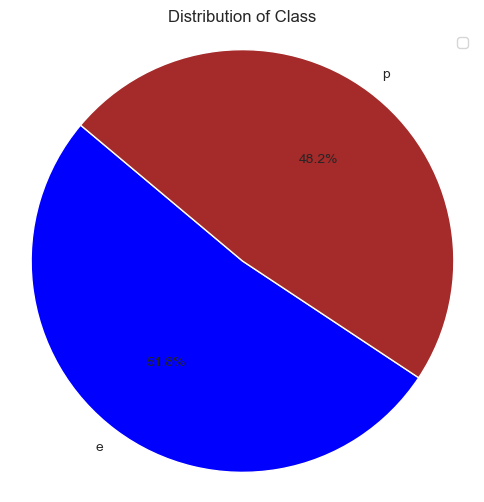

In [255]:
classcounts = df['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(classcounts, labels=classcounts.index, autopct='%1.1f%%', startangle=140, colors= ['blue','brown'])
plt.title('Distribution of Class')
plt.legend('')
plt.axis('equal')  

In [256]:
## endconding to numbercial data 

import pandas as pd

# Perform one-hot encoding on the entire DataFrame
encoded_df = pd.get_dummies(df)

print(encoded_df)


      class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0       False     True        False        False        False        False   
1        True    False        False        False        False        False   
2        True    False         True        False        False        False   
3       False     True        False        False        False        False   
4        True    False        False        False        False        False   
...       ...      ...          ...          ...          ...          ...   
8119     True    False        False        False        False         True   
8120     True    False        False        False        False        False   
8121     True    False        False        False         True        False   
8122    False     True        False        False        False         True   
8123     True    False        False        False        False        False   

      cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  .

In [257]:
encoded_df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [258]:
encoded_df.tail()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
8123,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


(-1.0999992858582142,
 1.0999915705125392,
 -1.0999992980379576,
 1.0999966350489419)

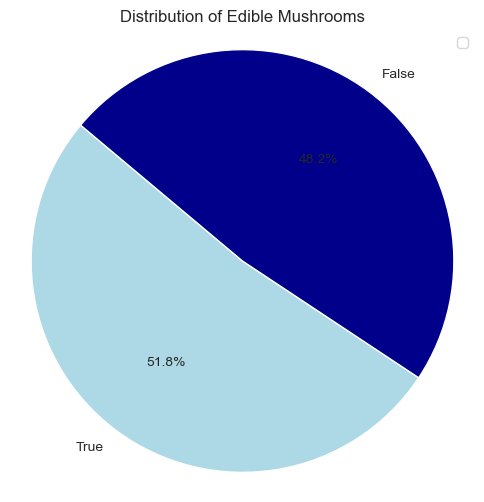

In [259]:
classcounts = encoded_df['class_e'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(classcounts, labels=classcounts.index, autopct='%1.1f%%', startangle=140, colors= ['lightblue','darkblue'])
plt.title('Distribution of Edible Mushrooms')
plt.legend('')
plt.axis('equal')  

In [260]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column separately
encoded_df2 = df.copy()  # Make a copy of the original DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        encoded_df2[column] = label_encoder.fit_transform(df[column])

print(encoded_df2)


      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

In [261]:
encoded_df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


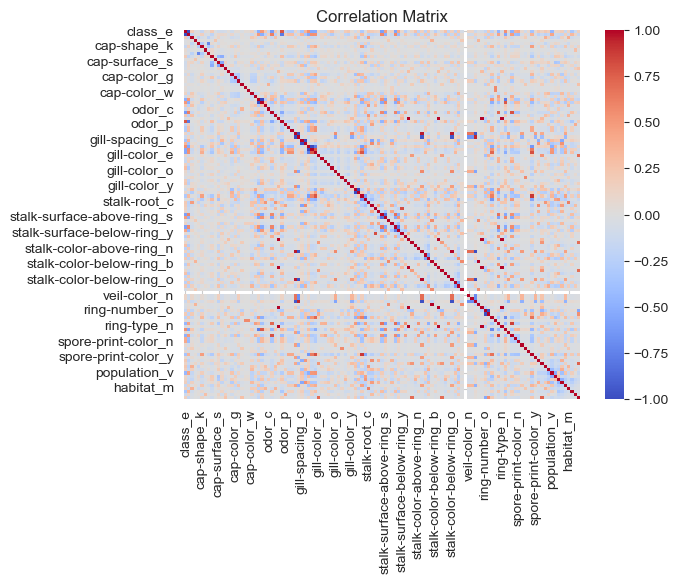

In [262]:
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [263]:
def cramers_v(x, y):
    confusion_matrix1 = pd.crosstab(x,y)
    chi2 = encoded_df.chi2_contingency(confusion_matrix1)[0]
    n = confusion_matrix1.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix1.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

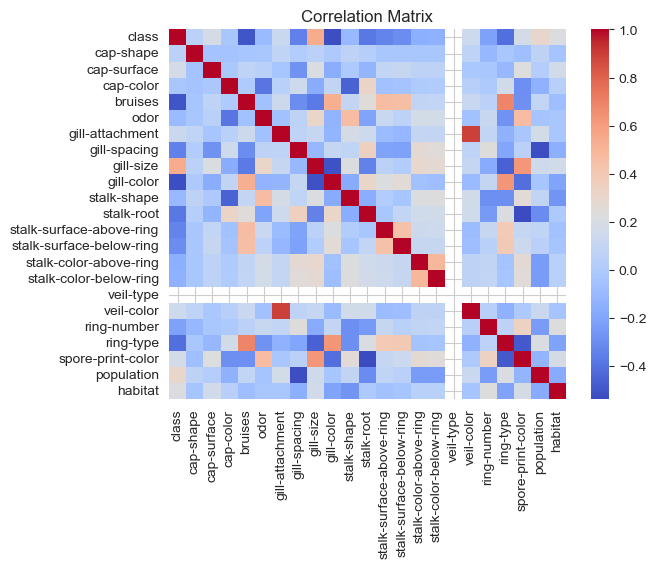

In [264]:
correlation_matrix = encoded_df2.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


what i wanna do: 

bruises to predictor (class) bar chart 


pie chart colours of edicible vs poisnous 

or ngl everuthing to class

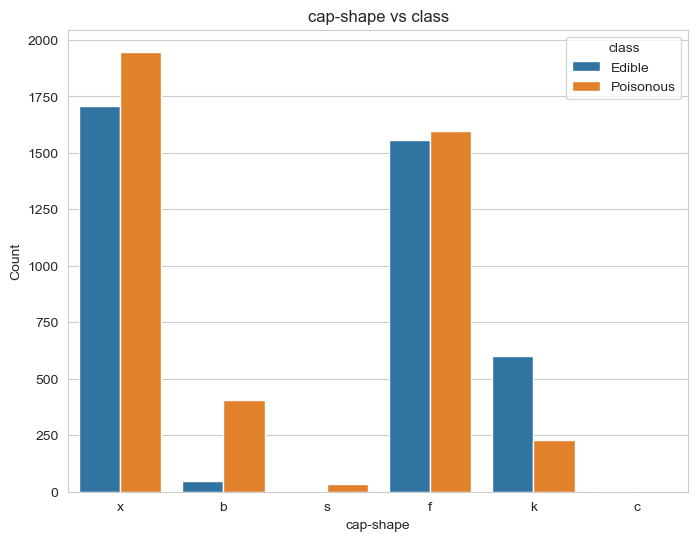

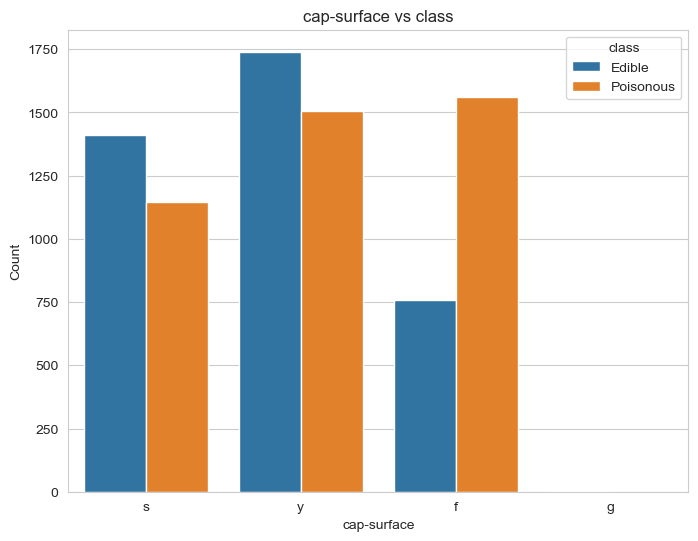

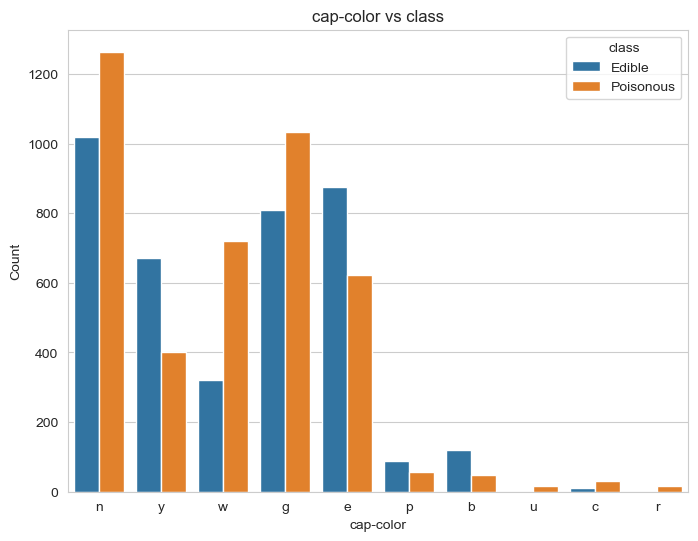

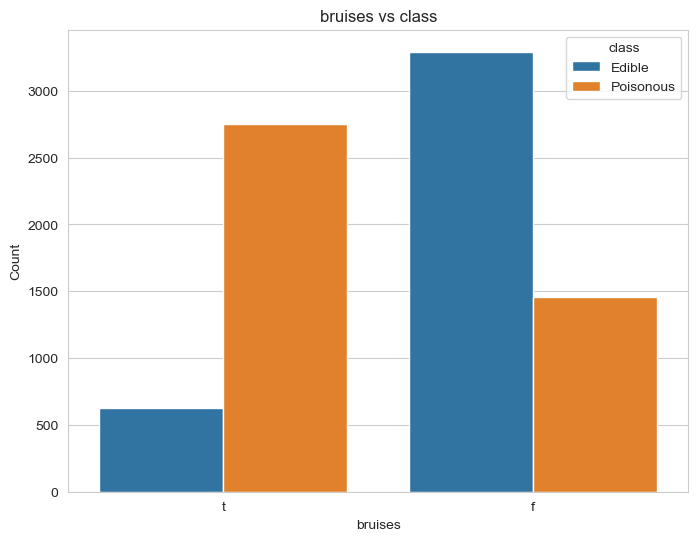

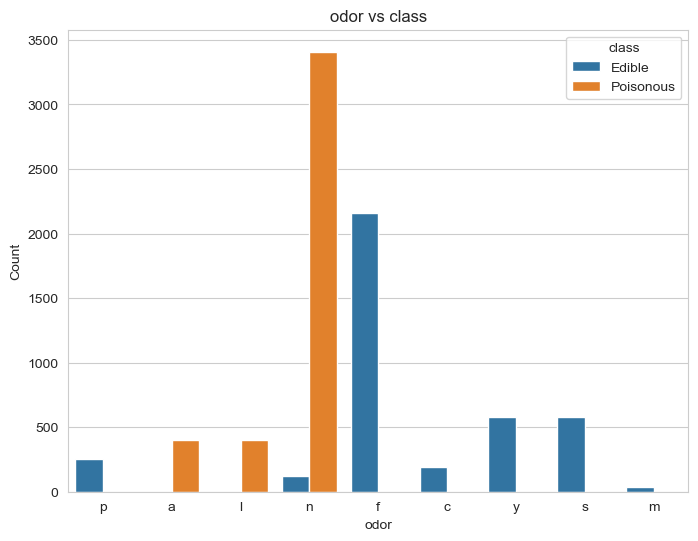

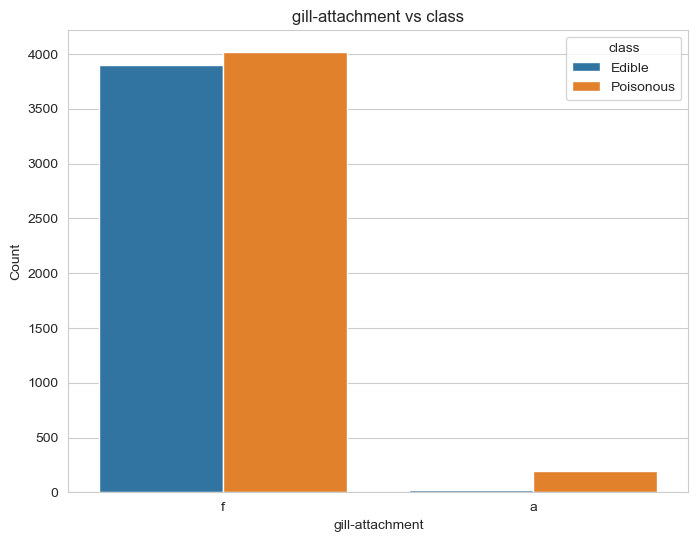

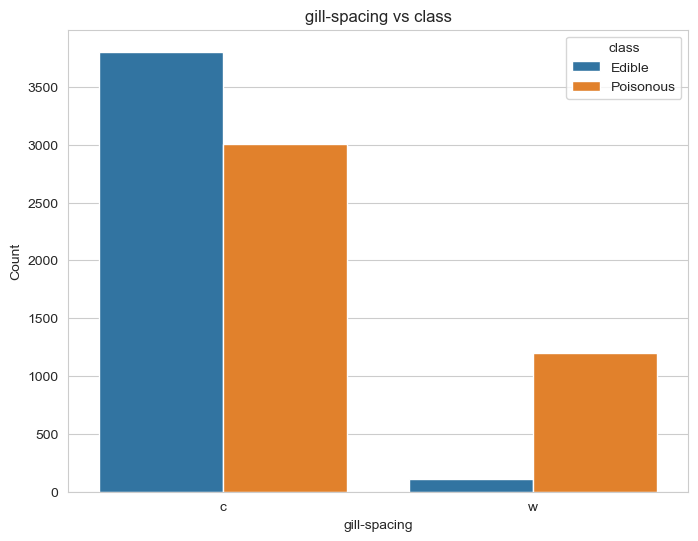

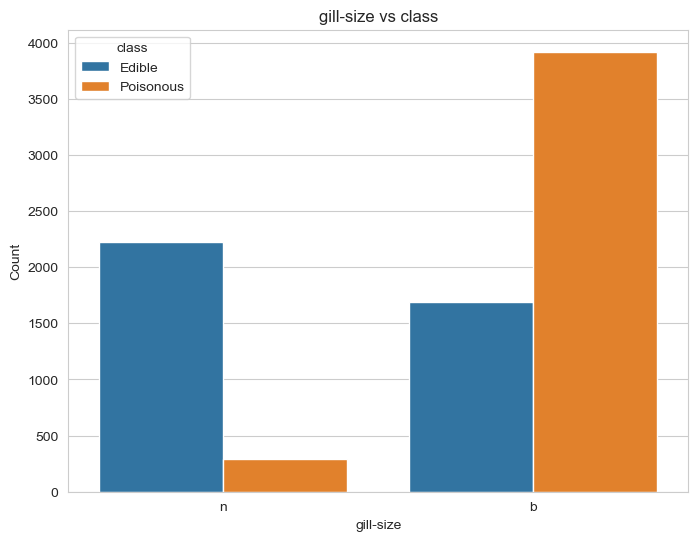

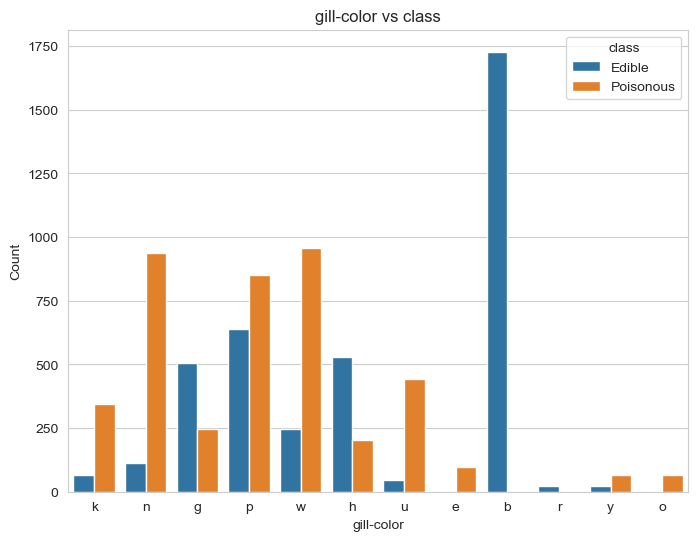

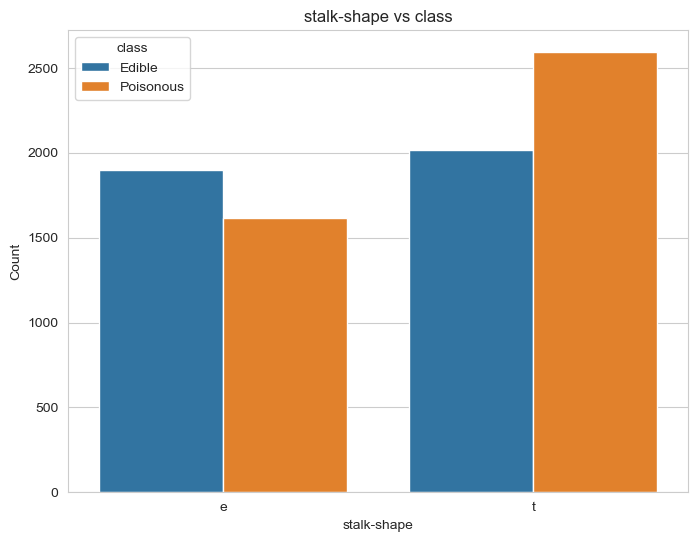

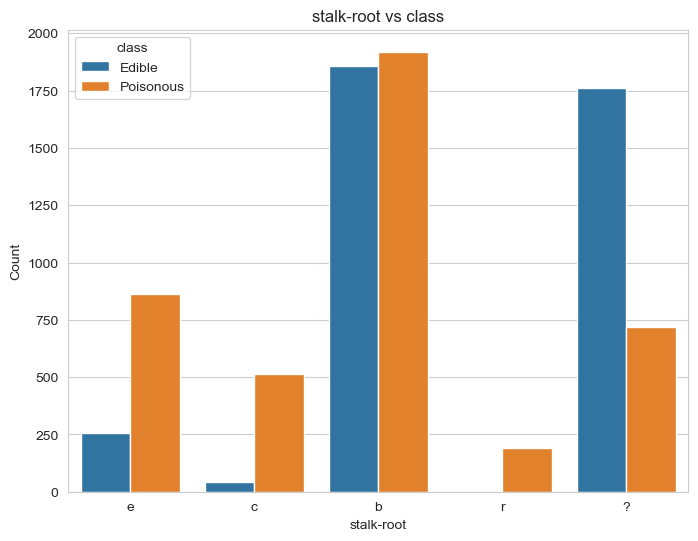

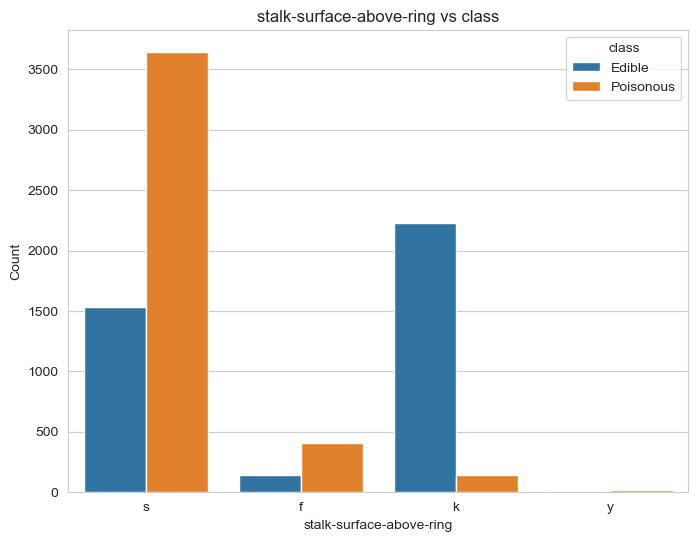

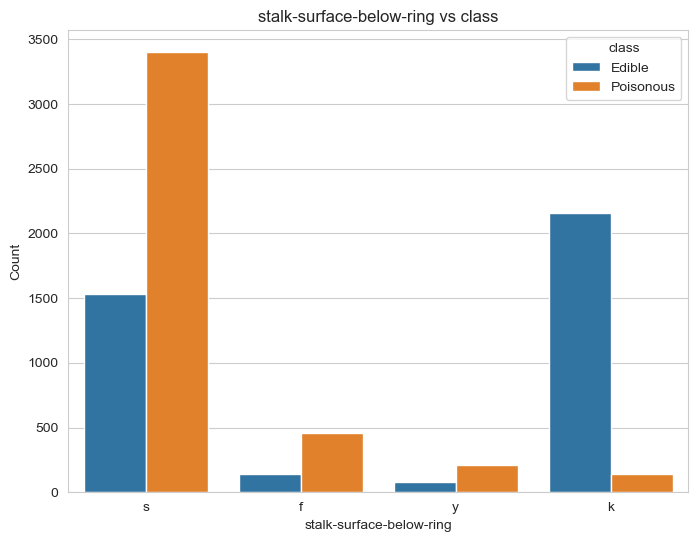

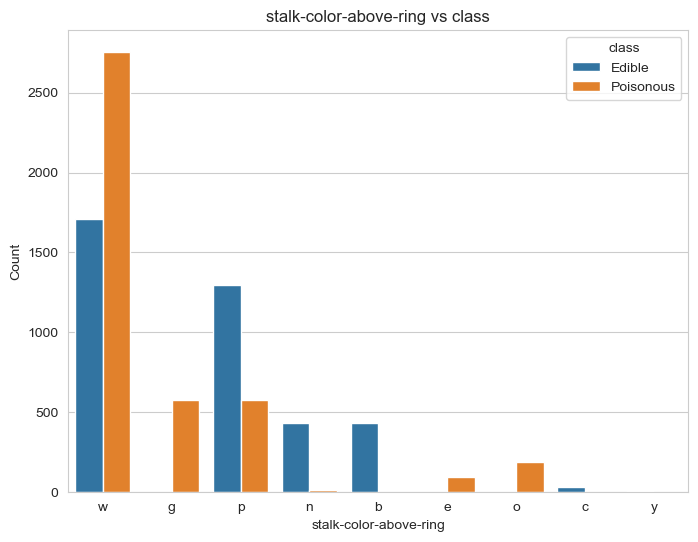

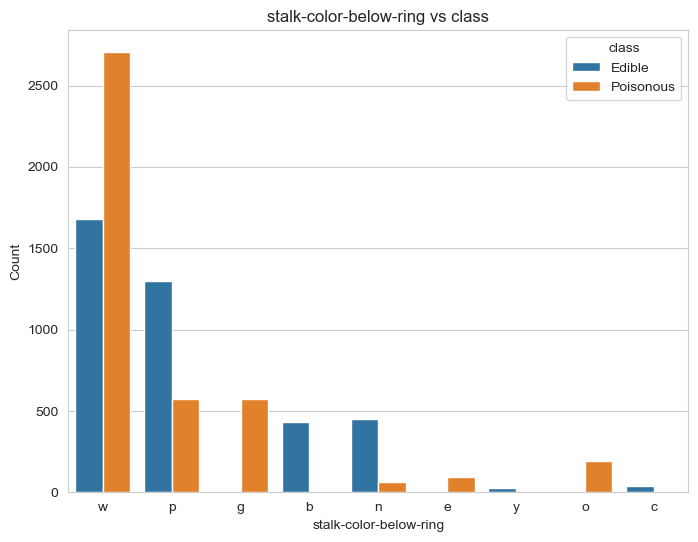

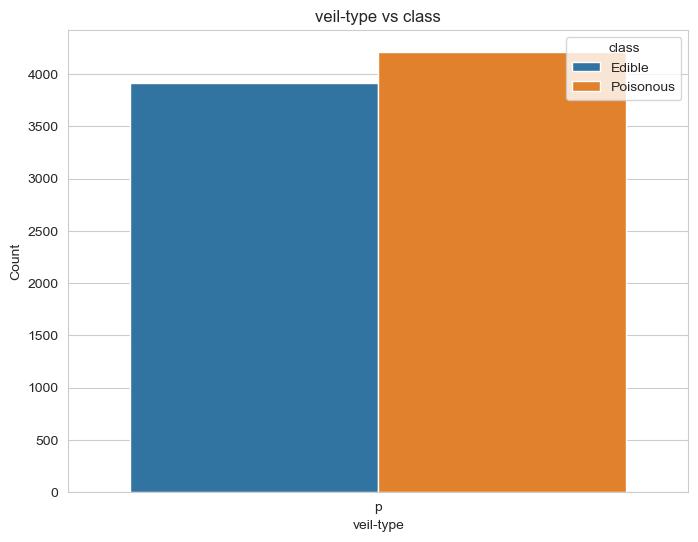

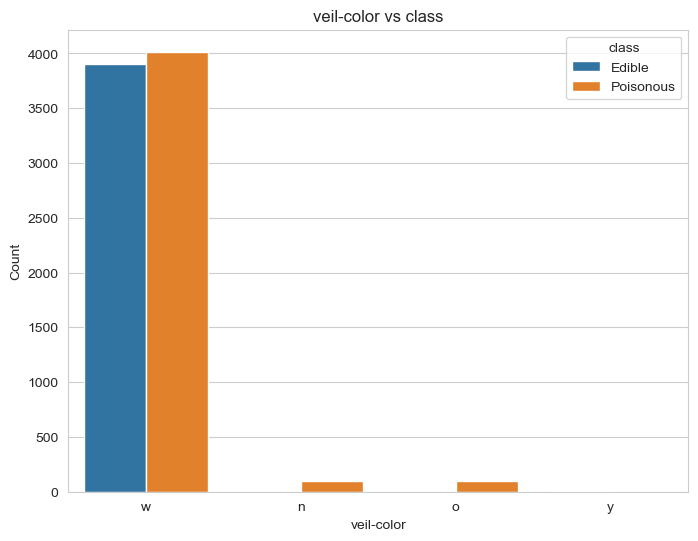

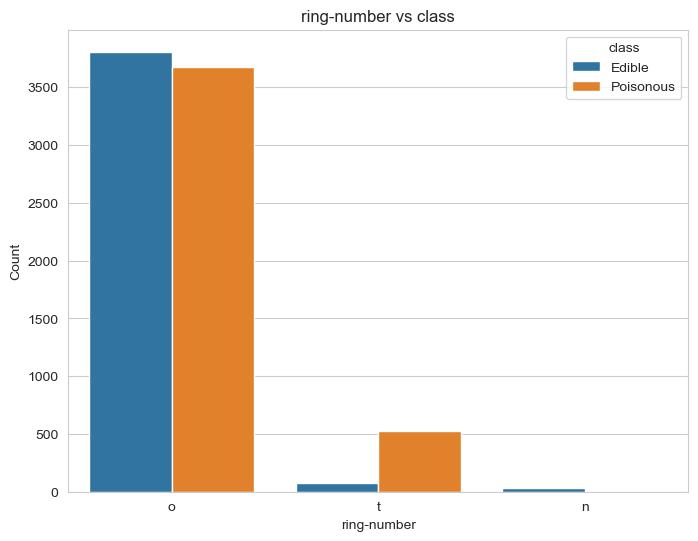

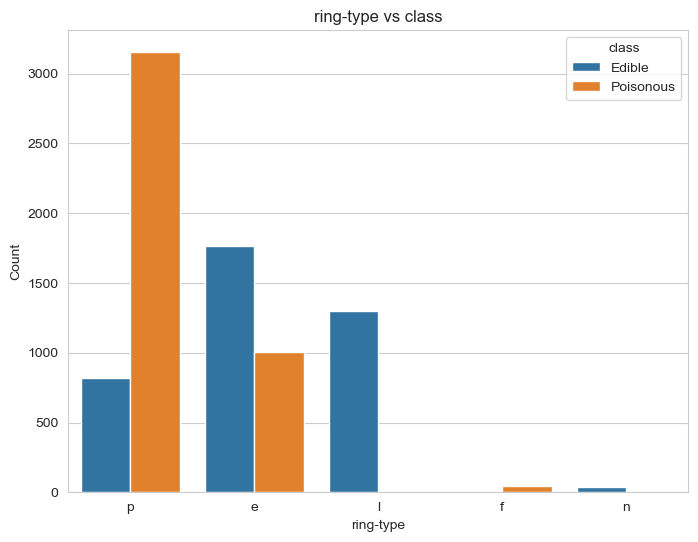

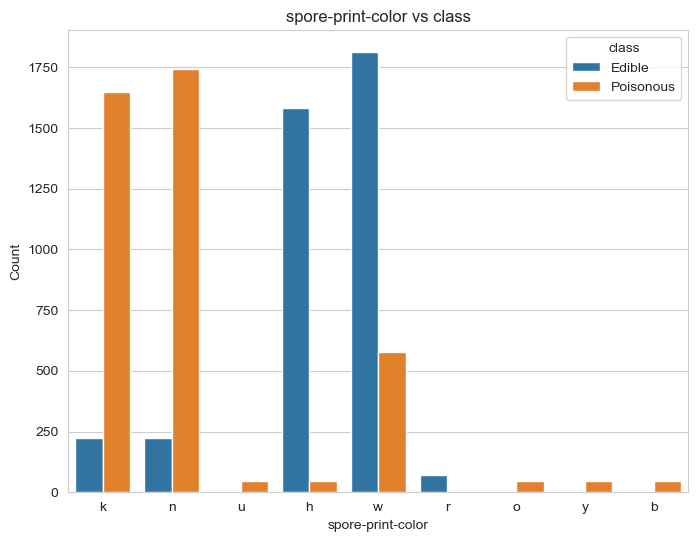

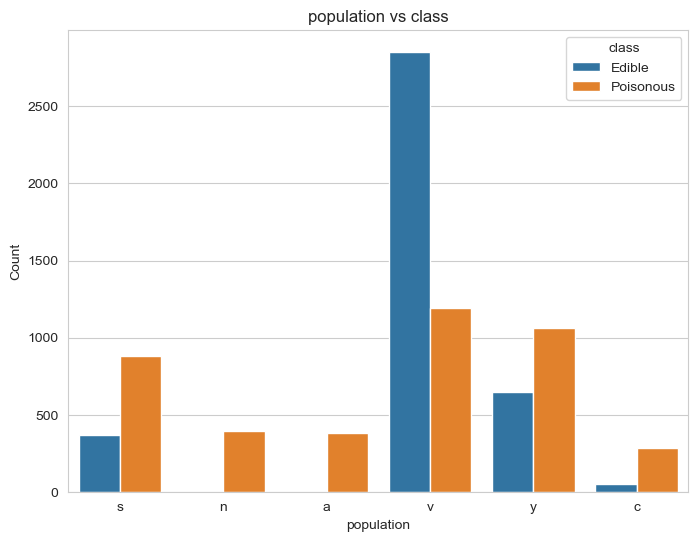

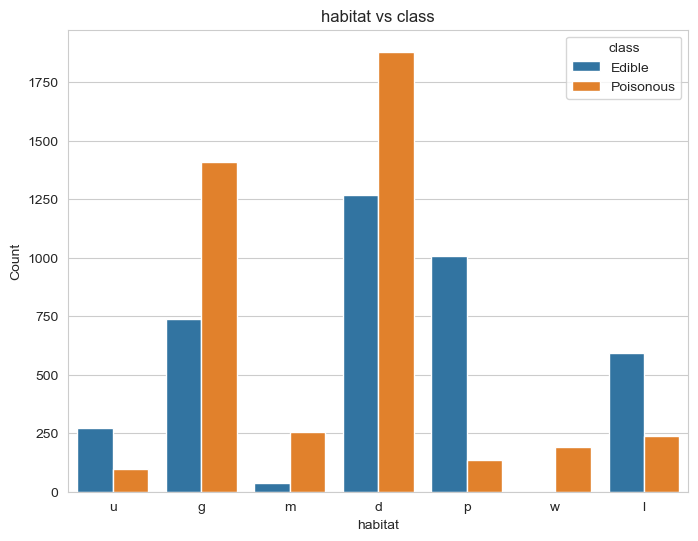

In [265]:
# Define the features (excluding DEATH_EVENT)
features = encoded_df2.drop("class", axis=1).columns

# Define the colors
colors = ["brown", "pink"]

# Plotting for categorical variables
for feature in features:
    if df[feature].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue="class", data=df)
        plt.title(f"{feature} vs class")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title='class', labels=['Edible', 'Poisonous'])
        plt.show()

# Plotting for continuous variables
for feature in features:
    if df[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=feature, hue="class", kde=True, color='pinks')
        plt.title(f"{feature} vs class")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title='DEATH_EVENT', labels=['Edible', 'Pousonous'])
        plt.show()

(-1.0999985882658774,
 1.0999955046830114,
 -1.0999996477880882,
 1.0999928523528797)

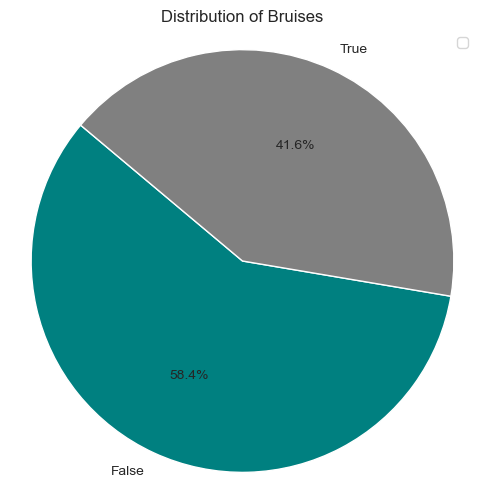

In [266]:
classcounts = encoded_df['bruises_t'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(classcounts, labels=classcounts.index, autopct='%1.1f%%', startangle=140, colors= ['teal','gray'])
plt.title('Distribution of Bruises')
plt.legend('')
plt.axis('equal')  

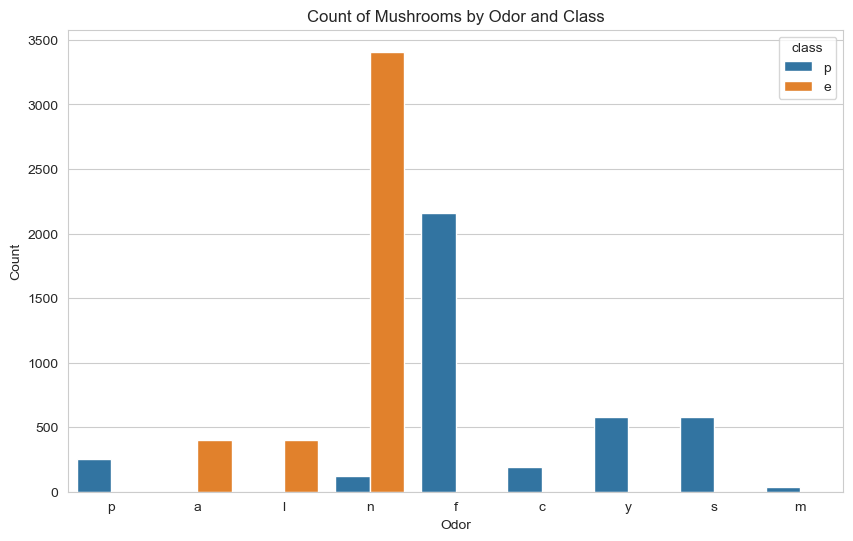

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a count plot for odor vs class
plt.figure(figsize=(10, 6))
sns.countplot(x='odor', hue='class', data=df)
plt.title('Count of Mushrooms by Odor and Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()


In [268]:
encoded_df

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [269]:
## BUT WITH ENCODER 1 THE LABEL ENCODER WAY
## split the data into independent and dependent variable
#X = encoded_df.drop(['class_e', 'class_p'], axis=1)  # Features (independent variables)
#y = encoded_df[['class_e', 'class_p']]    #target /predictor 

# will work if i encoded Y together but thats long stilllll
# as Y for the array needs to be 1 dimensional 

In [270]:
## BUT WITH ENCODER 2 THE LABEL ENCODER WAY
## split the data into independent and dependent variable
X = encoded_df2.drop('class', axis=1)  # Features (independent variables)
y = encoded_df2['class']    #target /predictor 

In [271]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [272]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


/Users/thuy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [273]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [274]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat_LR = confusion_matrix(y_test, pred_LR)

print("Logistics Regression Score:", accuracy_LR)
print(conf_mat_LR)


Logistics Regression Score: 0.9563076923076923
[[814  32]
 [ 39 740]]


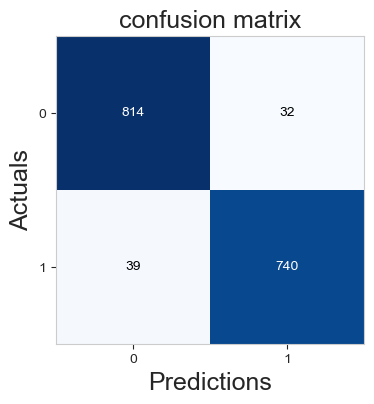

In [275]:
## confusion matrix plot NB
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_LR, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18 )
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

In [276]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 2. Make predictions
y_pred = logreg.predict(X_test)

# 3. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9563076923076923
Precision: 0.9585492227979274
Recall: 0.9499358151476252
F1-score: 0.9542230818826563
ROC-AUC: 0.9560553780229851


/Users/thuy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


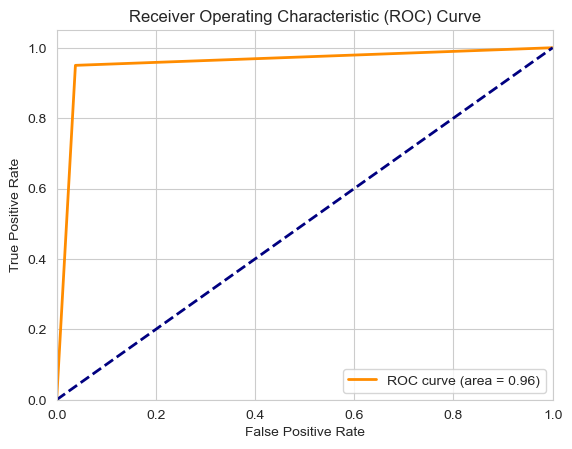

In [277]:

roc_auc = auc(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,1
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [ ]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print("NB Accuracy Score:", accuracy_NB)
print(conf_mat_NB)

NB Accuracy Score: 0.9187692307692308
[[768  78]
 [ 54 725]]


In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       846
           1       0.90      0.93      0.92       779

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



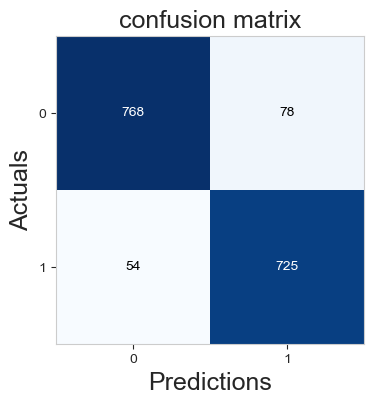

In [ ]:
## confusion matrix plot NB
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

CONFUSION MATRIC
0 is edible 
1 is poisonius 

so true positibe it is edible it predicted it correct 768 times and missed 78
true negative, predicting that it was poisonous correctly was 725 times and missed 54 


Logistics Regression
LR Score: 0.9563076923076923
N
NB Accuracy Score: 0.9187692307692308